In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み
### カレンダーmergeされたところから

In [2]:
df_train = pd.read_csv("train_data_merged.csv")
df_val = pd.read_csv("val_data_merged.csv")
df_test = pd.read_csv("output_test_data.csv")
calender = pd.read_csv("jp_calendar_data.csv")
df_test = df_test.rename(columns={"datetime": "Unnamed: 0"})

In [3]:
calender.head()

,Unnamed: 0,day_of_the_week,holiday_flg,holiday_name,days_from_last_holiday,days_of_consecutive_holidays
0,2013-11-04,Monday,1,文化の日 振替休日,0.0,1.0
1,2013-11-05,Tuesday,0,NaN,1.0,0.0
2,2013-11-06,Wednesday,0,NaN,2.0,0.0
3,2013-11-07,Thursday,0,NaN,3.0,0.0
4,2013-11-08,Friday,0,NaN,4.0,0.0


In [4]:
df_train["Unnamed: 0"] = pd.to_datetime(df_train["Unnamed: 0"])

In [5]:
df_val["Unnamed: 0"] = pd.to_datetime(df_val["Unnamed: 0"])

In [6]:
df_test["Unnamed: 0"] = pd.to_datetime(df_test["Unnamed: 0"])

In [7]:
calender["Unnamed: 0"] = pd.to_datetime(calender["Unnamed: 0"])

In [8]:
df_test = pd.merge(df_test, calender, on = "Unnamed: 0", how = "left")

In [9]:
df_test["y"] = np.nan

In [10]:
df_test = df_test[df_train.columns]

### 週番号を追加する

In [11]:
df_train["week_num"] = df_train["Unnamed: 0"].dt.week
df_val["week_num"] = df_val["Unnamed: 0"].dt.week
df_test["week_num"] = df_test["Unnamed: 0"].dt.week

In [12]:
df_train["kukan"] = 1
df_val["kukan"] = 0
df_test["kukan"] = 2

# 年と月と日も一応

In [13]:
df_train["year"] = df_train["Unnamed: 0"].map(lambda x: x.year)
df_train["month"] = df_train["Unnamed: 0"].map(lambda x: x.month)
df_train["day"] = df_train["Unnamed: 0"].map(lambda x: x.day)

In [14]:
df_val["year"] = df_val["Unnamed: 0"].map(lambda x: x.year)
df_val["month"] = df_val["Unnamed: 0"].map(lambda x: x.month)
df_val["day"] = df_val["Unnamed: 0"].map(lambda x: x.day)

In [15]:
df_test["year"] = df_test["Unnamed: 0"].map(lambda x: x.year)
df_test["month"] = df_test["Unnamed: 0"].map(lambda x: x.month)
df_test["day"] = df_test["Unnamed: 0"].map(lambda x: x.day)

In [16]:
df_dataset = pd.concat([df_train, df_val, df_test]).reset_index(drop=True)

In [17]:
df_train

,Unnamed: 0,y,soldout,kcal,weather,precipitation,temperature,月,木,水,...,チキン,その他,holiday_flg,days_from_last_holiday,days_of_consecutive_holidays,week_num,kukan,year,month,day
0,2013-11-18,90.0,0,422.000000,1,0.0,19.8,1,0,0,...,0,0,0,1.0,0.0,47,1,2013,11,18
1,2013-11-19,101.0,1,411.107143,1,0.0,17.0,0,0,0,...,0,0,0,2.0,0.0,47,1,2013,11,19
2,2013-11-20,118.0,0,405.040816,1,0.0,15.5,0,0,1,...,0,0,0,3.0,0.0,47,1,2013,11,20
3,2013-11-21,120.0,1,405.040816,1,0.0,15.2,0,1,0,...,0,0,0,4.0,0.0,47,1,2013,11,21
4,2013-11-22,130.0,1,411.107143,1,0.0,16.1,0,0,0,...,0,0,0,5.0,0.0,47,1,2013,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2014-07-18,55.0,1,401.000000,4,0.0,25.6,0,0,0,...,0,0,0,5.0,0.0,29,1,2014,7,18
161,2014-07-22,53.0,0,409.000000,2,0.0,30.2,0,0,0,...,0,0,0,1.0,0.0,30,1,2014,7,22
162,2014-07-23,56.0,1,355.000000,3,0.0,32.0,0,0,1,...,0,0,0,2.0,0.0,30,1,2014,7,23
163,2014-07-24,62.0,1,410.000000,4,0.0,32.5,0,1,0,...,1,0,0,3.0,0.0,30,1,2014,7,24


In [18]:
df_dataset.columns

Index(['Unnamed: 0', 'y', 'soldout', 'kcal', 'weather', 'precipitation',
       'temperature', '月', '木', '水', '火', '金', 'お楽しみメニュー', 'スペシャルメニュー（800円）',
       '手作りの味', '料理長のこだわりメニュー', '近隣に飲食店複合ビルオープン', '酢豚（28食）、カレー（85食）',
       '鶏のレモンペッパー焼（50食）、カレー（42食）', 'キャリアアップ支援セミナー', 'ママの会', '給料日経過日数', 'カツ',
       'カレー', 'ハンバーグ', '中華', 'フライ', 'チキン', 'その他', 'holiday_flg',
       'days_from_last_holiday', 'days_of_consecutive_holidays', 'week_num',
       'kukan', 'year', 'month', 'day'],
      dtype='object')

## イベント系いらないんじゃないか

In [19]:
event_list = ['お楽しみメニュー', 'スペシャルメニュー（800円）',
             '手作りの味', '料理長のこだわりメニュー', '近隣に飲食店複合ビルオープン', '酢豚（28食）、カレー（85食）',
              '鶏のレモンペッパー焼（50食）、カレー（42食）', 'キャリアアップ支援セミナー', 'ママの会'
             ]

学習


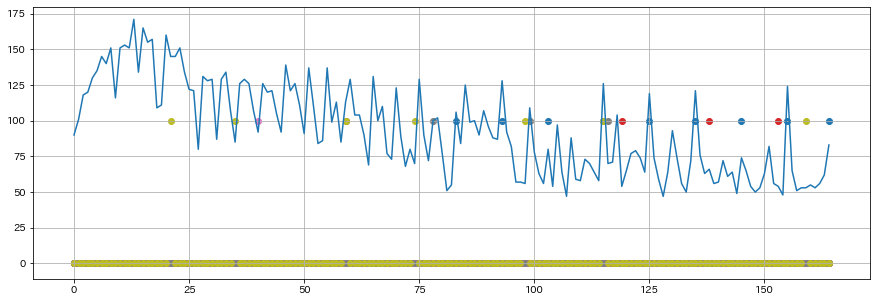

評価


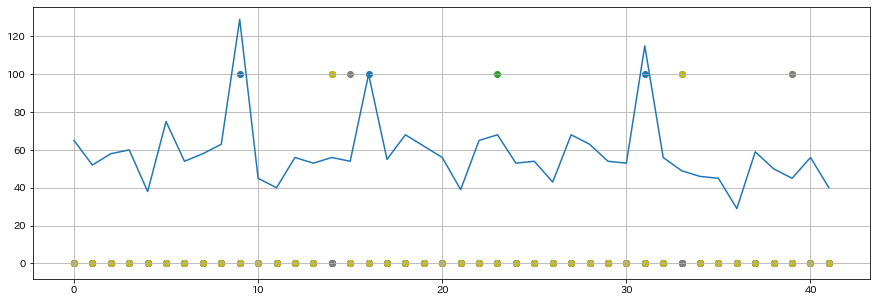

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df_train["y"])

print ("学習")
for i in event_list:
    plt.scatter(df_train.index, df_train[i]*100)
plt.grid()
plt.show()
plt.figure(figsize=(15,5))
plt.plot(df_val["y"])
print ("評価")
for i in event_list:
    plt.scatter(df_val.index, df_val[i]*100)
plt.grid()
plt.show()

In [21]:
tr = []
te = []
for e in event_list:
    tmp_tr = list(df_dataset[(df_dataset[e] == 1) & (df_dataset["kukan"] == 1)]["y"])
    tmp_te = list(df_dataset[(df_dataset[e] == 1) & (df_dataset["kukan"] == 0)]["y"])
    tr.append(tmp_tr)
    te.append(tmp_te)

In [22]:
event_list

['お楽しみメニュー',
 'スペシャルメニュー（800円）',
 '手作りの味',
 '料理長のこだわりメニュー',
 '近隣に飲食店複合ビルオープン',
 '酢豚（28食）、カレー（85食）',
 '鶏のレモンペッパー焼（50食）、カレー（42食）',
 'キャリアアップ支援セミナー',
 'ママの会']

学習


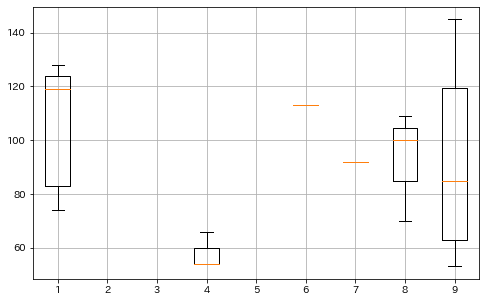

評価


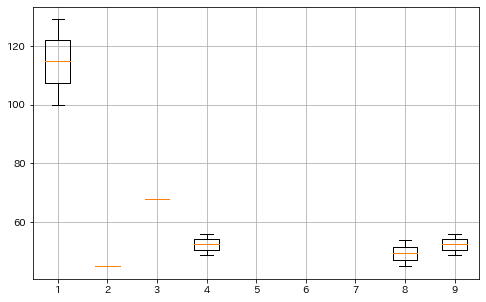

In [23]:
print ("学習")
plt.figure(figsize=(8,5))
plt.boxplot(tr)
plt.grid()
plt.show()
print ("評価")
plt.figure(figsize=(8,5))
plt.boxplot(te)
plt.grid()
plt.show()

- お楽しみメニューは良さそう
(学習、評価共にスパイクにフラグが立つ)

# 月ごとの折れ線をみるよ

11


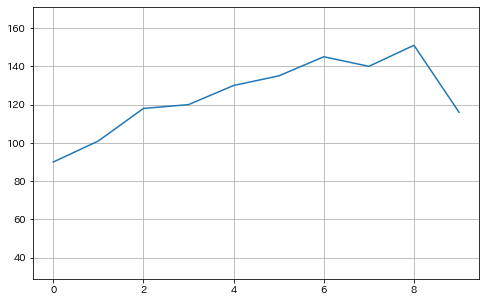

12


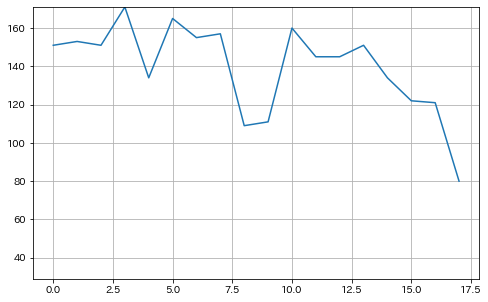

1


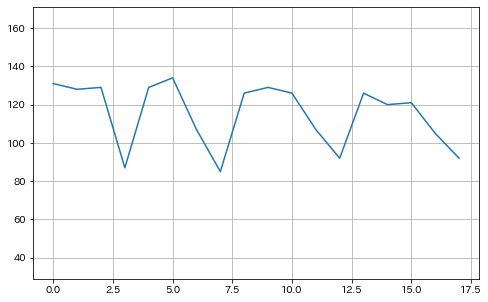

2


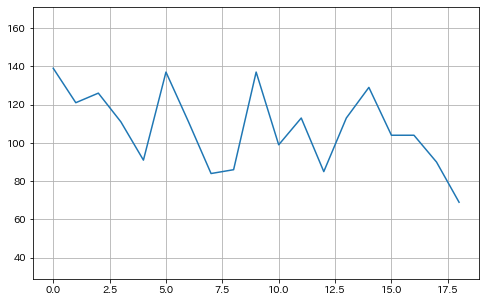

3


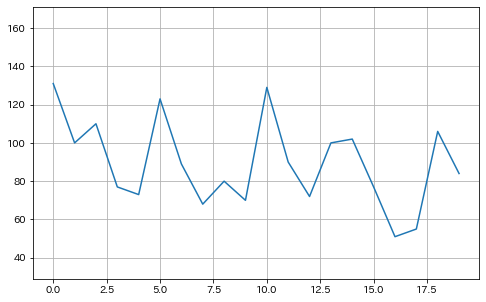

4


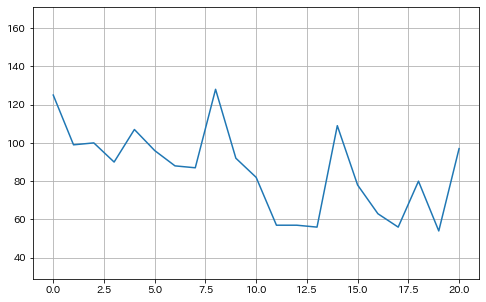

5


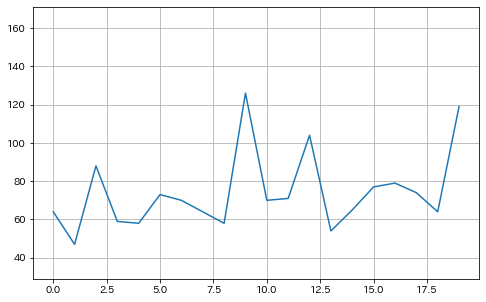

6


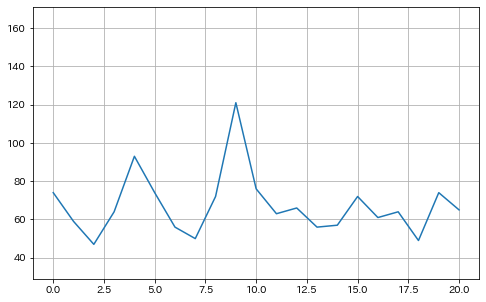

7


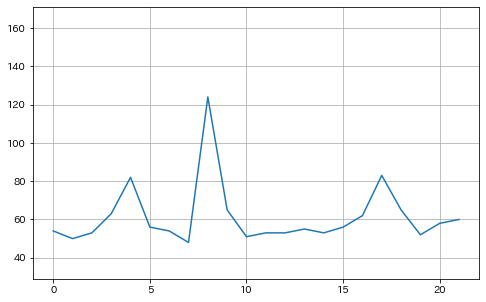

8


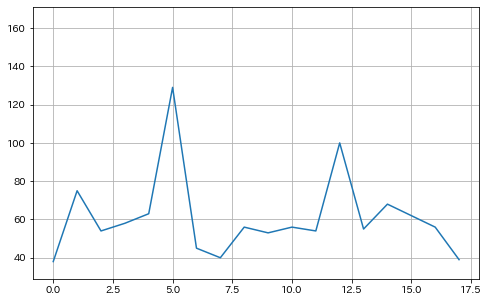

9


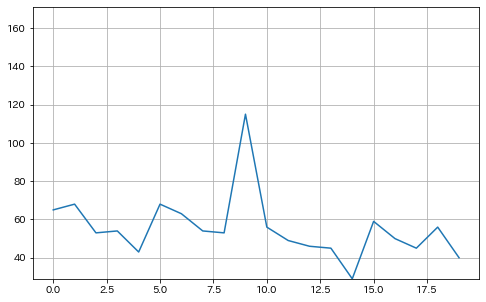

10


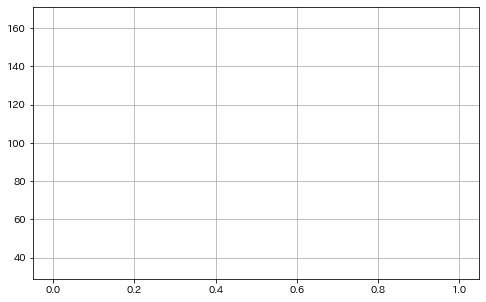

11


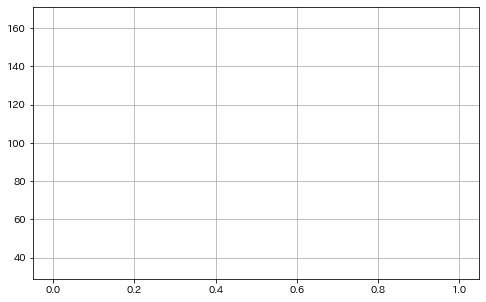

In [24]:

for i, d in df_dataset.groupby(["year", "month"]):
    print (d["month"].unique()[0])
    plt.figure(figsize=(8,5))
    plt.plot(d["y"].reset_index(drop=True))
    plt.ylim(df_dataset["y"].min(), df_dataset["y"].max())
    plt.grid()
    plt.show()

- ふむふむ
- 11月はなんか傾向違うけど、その他の月はなんか似ているか

## 移動平均取ってみる
- rollingは自分も含めるから、ずらしてから

In [25]:
df_dataset["y_shift"] = df_dataset["y"].shift(1)

In [26]:
df_dataset[["y","y_shift"]]

,y,y_shift
0,90.0,NaN
1,101.0,90.0
2,118.0,101.0
3,120.0,118.0
4,130.0,120.0
...,...,...
242,NaN,NaN
243,NaN,NaN
244,NaN,NaN
245,NaN,NaN


1日前


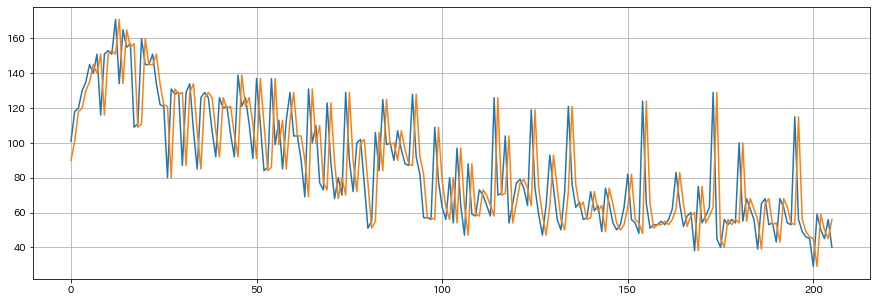

移動平均2


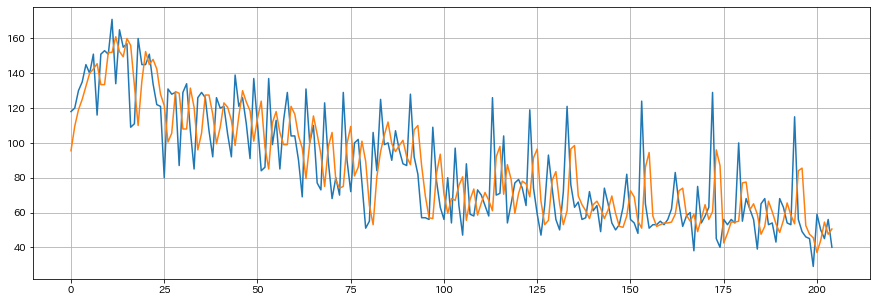

移動平均５


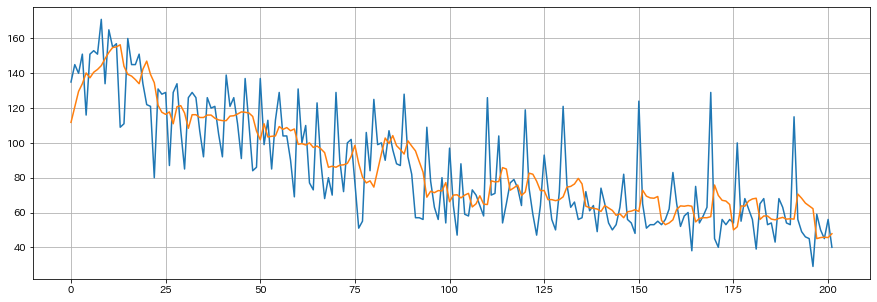

移動平均10


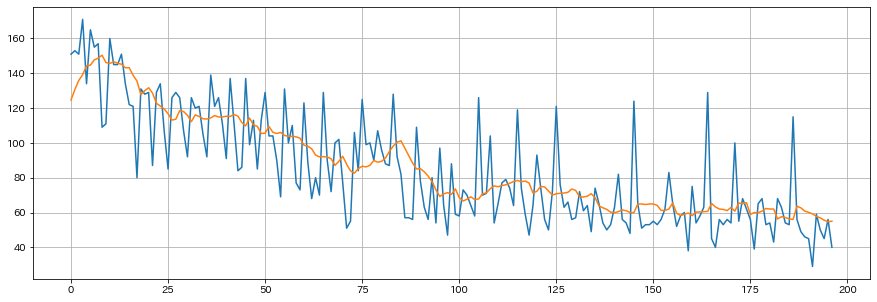

In [27]:
df_dataset["y_2"] = df_dataset["y_shift"].rolling(window = 2).mean()
temp_df = df_dataset[["y", "y_shift"]].dropna().reset_index(drop=True)
print ("1日前")
plt.figure(figsize=(15,5))
plt.plot(temp_df["y"])
plt.plot(temp_df["y_shift"])
plt.grid()
plt.show()

df_dataset["y_2"] = df_dataset["y_shift"].rolling(window = 2).mean()
temp_df = df_dataset[["y", "y_2"]].dropna().reset_index(drop=True)
print ("移動平均2")
plt.figure(figsize=(15,5))
plt.plot(temp_df["y"])
plt.plot(temp_df["y_2"])
plt.grid()
plt.show()

df_dataset["y_5"] = df_dataset["y_shift"].rolling(window = 5).mean()
temp_df = df_dataset[["y", "y_5"]].dropna().reset_index(drop=True)
print ("移動平均５")
plt.figure(figsize=(15,5))
plt.plot(temp_df["y"])
plt.plot(temp_df["y_5"])
plt.grid()
plt.show()

df_dataset["y_10"] = df_dataset["y_shift"].rolling(window = 10).mean()
temp_df = df_dataset[["y", "y_10"]].dropna().reset_index(drop=True)
print ("移動平均10")
plt.figure(figsize=(15,5))
plt.plot(temp_df["y"])
plt.plot(temp_df["y_10"])
plt.grid()
plt.show()

In [28]:
df_dataset[["y", "y_2", "y_5", "y_10"]].head()

,y,y_2,y_5,y_10
0,90.0,NaN,NaN,NaN
1,101.0,NaN,NaN,NaN
2,118.0,95.5,NaN,NaN
3,120.0,109.5,NaN,NaN
4,130.0,119.0,NaN,NaN


- 移動平均は全体の落ちていく傾向は捉えているな
- なんでだんだん月日がたつと売れなくなるんだ？？
- お弁当ってそんなもん？

In [29]:
df_dataset.head()

,Unnamed: 0,y,soldout,kcal,weather,precipitation,temperature,月,木,水,...,days_of_consecutive_holidays,week_num,kukan,year,month,day,y_shift,y_2,y_5,y_10
0,2013-11-18,90.0,0,422.000000,1,0.0,19.8,1,0,0,...,0.0,47,1,2013,11,18,NaN,NaN,NaN,NaN
1,2013-11-19,101.0,1,411.107143,1,0.0,17.0,0,0,0,...,0.0,47,1,2013,11,19,90.0,NaN,NaN,NaN
2,2013-11-20,118.0,0,405.040816,1,0.0,15.5,0,0,1,...,0.0,47,1,2013,11,20,101.0,95.5,NaN,NaN
3,2013-11-21,120.0,1,405.040816,1,0.0,15.2,0,1,0,...,0.0,47,1,2013,11,21,118.0,109.5,NaN,NaN
4,2013-11-22,130.0,1,411.107143,1,0.0,16.1,0,0,0,...,0.0,47,1,2013,11,22,120.0,119.0,NaN,NaN


# １週間前の同じ曜日のデータを引っ張ってくる

In [30]:
df_dataset['day_of_the_week'] = df_dataset["Unnamed: 0"].map(lambda x: x.weekday_name)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


In [31]:
dataset_new = pd.DataFrame([])
for i, d in df_dataset.groupby("day_of_the_week"):
    sift = list(d["y"].shift(1).reset_index(drop=True))
    d = d.reset_index(drop=True)
    d.loc[:, "y_shift_youbi"] = sift
    dataset_new = pd.concat([dataset_new, d])
dataset_new = dataset_new.sort_values("Unnamed: 0").reset_index(drop=True)

In [32]:
dataset_new[["Unnamed: 0", "day_of_the_week", "y", "y_shift_youbi"]]

,Unnamed: 0,day_of_the_week,y,y_shift_youbi
0,2013-11-18,Monday,90.0,NaN
1,2013-11-19,Tuesday,101.0,NaN
2,2013-11-20,Wednesday,118.0,NaN
3,2013-11-21,Thursday,120.0,NaN
4,2013-11-22,Friday,130.0,NaN
...,...,...,...,...
242,2014-11-21,Friday,NaN,NaN
243,2014-11-25,Tuesday,NaN,NaN
244,2014-11-26,Wednesday,NaN,NaN
245,2014-11-27,Thursday,NaN,NaN


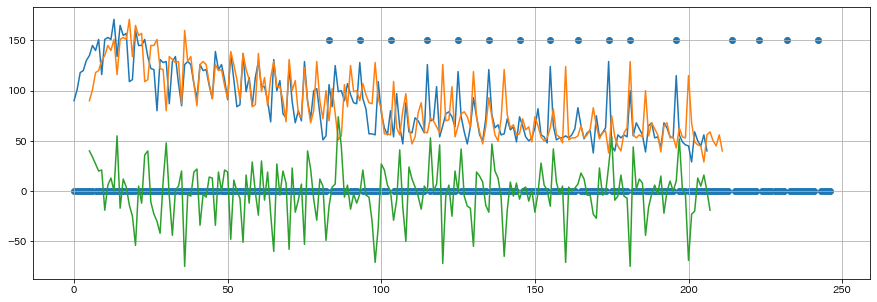

In [33]:
plt.figure(figsize=(15,5))
plt.plot(dataset_new["y"])
plt.plot(dataset_new["y_shift_youbi"])
plt.scatter(dataset_new.index, dataset_new["お楽しみメニュー"] * 150)
plt.plot(dataset_new["y_shift"] - dataset_new["y_shift_youbi"])

plt.grid()
plt.show()

- いい感じやん！
- お楽しみメニューのスパイクが邪魔している日があるのはどうしようか
- 1日ずらした自己回帰と引き算で相殺されないかなー

### ここまでみたけど大事なことを忘れていました。。。。。

# それは
## それは
### それは

# 実際に予測しないといけない部分の説明変数が作れない!!


### ということでやり直し

### 最後のデータが計算できる９週間前のデータを使用する

In [41]:
df_dataset = df_dataset.sort_values("Unnamed: 0")

In [42]:
dataset_new = pd.DataFrame([])
for i, d in df_dataset.groupby("day_of_the_week"):
    sift = list(d["y"].shift(9).reset_index(drop=True))
    d = d.reset_index(drop=True)
    d.loc[:, "y_shift_youbi"] = sift
    dataset_new = pd.concat([dataset_new, d])
dataset_new = dataset_new.sort_values("Unnamed: 0").reset_index(drop=True)

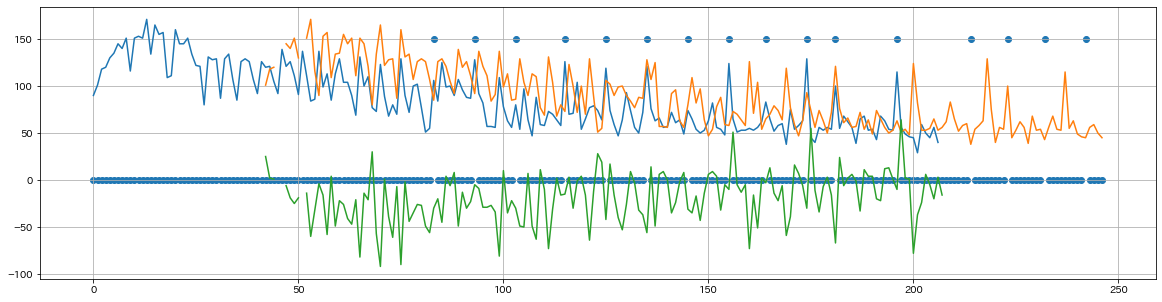

In [55]:
plt.figure(figsize=(20,5))
plt.plot(dataset_new["y"])
plt.plot(dataset_new["y_shift_youbi"])
plt.scatter(dataset_new.index, dataset_new["お楽しみメニュー"] * 150)
plt.plot(dataset_new["y_shift"] - dataset_new["y_shift_youbi"])

plt.grid()
plt.show()

In [56]:
dataset_new[dataset_new["y_shift_youbi"] != dataset_new["y_shift_youbi"]]

,Unnamed: 0,y,soldout,kcal,weather,precipitation,temperature,月,木,水,...,kukan,year,month,day,y_shift,y_2,y_5,y_10,day_of_the_week,y_shift_youbi
0,2013-11-18,90.0,0,422.000000,1,0.0,19.8,1,0,0,...,1,2013,11,18,NaN,NaN,NaN,NaN,Monday,NaN
1,2013-11-19,101.0,1,411.107143,1,0.0,17.0,0,0,0,...,1,2013,11,19,90.0,NaN,NaN,NaN,Tuesday,NaN
2,2013-11-20,118.0,0,405.040816,1,0.0,15.5,0,0,1,...,1,2013,11,20,101.0,95.5,NaN,NaN,Wednesday,NaN
3,2013-11-21,120.0,1,405.040816,1,0.0,15.2,0,1,0,...,1,2013,11,21,118.0,109.5,NaN,NaN,Thursday,NaN
4,2013-11-22,130.0,1,411.107143,1,0.0,16.1,0,0,0,...,1,2013,11,22,120.0,119.0,NaN,NaN,Friday,NaN
5,2013-11-25,135.0,1,405.040816,4,0.0,14.6,1,0,0,...,1,2013,11,25,130.0,125.0,111.8,NaN,Monday,NaN
6,2013-11-26,145.0,0,405.040816,1,0.0,17.9,0,0,0,...,1,2013,11,26,135.0,132.5,120.8,NaN,Tuesday,NaN
7,2013-11-27,140.0,1,396.000000,2,0.0,14.7,0,0,1,...,1,2013,11,27,145.0,140.0,129.6,NaN,Wednesday,NaN
8,2013-11-28,151.0,0,425.000000,3,0.0,17.7,0,1,0,...,1,2013,11,28,140.0,142.5,134.0,NaN,Thursday,NaN
9,2013-11-29,116.0,0,411.107143,1,0.0,12.1,0,0,0,...,1,2013,11,29,151.0,145.5,140.2,NaN,Friday,NaN


## データセットの最初は、２月１２日から使用する

In [54]:
dataset_new[["y", "y_shift_youbi"]].corr()

,y,y_shift_youbi
y,1.000000,0.570963
y_shift_youbi,0.570963,1.000000
